In [17]:
library('igraph')
library('dplyr')

<h2>Question 6</h2>

In [3]:
movement_graph <- read.table('../uber_data/movement_edgelist.txt')

In [4]:
g <- graph_from_data_frame(movement_graph, directed=FALSE)

In [6]:
E(g)$weight=as.numeric(movement_graph[,3])

In [7]:
is.connected(g)
writeLines(paste("Number of edges: ", ecount(g)))
writeLines(paste("Number of vertices: ", vcount(g)))
writeLines(paste("Diameter: ", diameter(g)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] FALSE

Number of edges:  311812
Number of vertices:  1887
Diameter:  11911.84


In [11]:
dg <- decompose.graph(g)      
gcc_index <- which.max(sapply(dg,vcount))
gcc <- dg[[gcc_index]] 
clusters <- components(gcc)
print(dim(groups(clusters)))
writeLines(paste("Number of edges: ", ecount(gcc)))
writeLines(paste("Number of vertices: ", vcount(gcc)))
writeLines(paste("Diameter of GCC: ", diameter(gcc)))

[1] 1
Number of edges:  311802
Number of vertices:  1880
Diameter of GCC:  11911.84


In [14]:
geo_data <- read.table('../uber_data/geo_data.csv', sep=',', header=TRUE)

In [33]:
#print(which(name_sectors_colors$Symbol == 'ZTS'))
print(geo_data[which(geo_data$movement_id == '1'),1])

[1] Sargent Creek, San Ardo
2704 Levels: 0 12th East Street, Pittsburg ...


In [59]:
which(V(gcc)$name == v)

[1] 1

In [56]:
v = 6
print(v)
gcc <- set_vertex_attr(gcc, "location", index=which(V(gcc)$name == v), as.character(geo_data[which(geo_data$movement_id == v), 2]))
gcc <- set_vertex_attr(gcc, "display_name", index=which(V(gcc)$name == v), as.character(geo_data[which(geo_data$movement_id == v), 1]))

[1] 6


In [53]:
geo_data[which(geo_data$movement_id == v), 1]

[1] 100 Carlsbad Circle, Vacaville
2704 Levels: 0 12th East Street, Pittsburg ...

In [57]:
vertex_attr(gcc, index=1)

$name
[1] "6"

$location
[1] "[-121.94843241   38.36665327]"

$display_name
[1] "100 Carlsbad Circle, Vacaville"

In [60]:
for (v in V(gcc)$name) {
    gcc <- set_vertex_attr(gcc, "location", index=which(V(gcc)$name == v), 
                           as.character(geo_data[which(geo_data$movement_id == v), 2]))
    gcc <- set_vertex_attr(gcc, "display_name", index=which(V(gcc)$name == v), 
                           as.character(geo_data[which(geo_data$movement_id == v), 1]))
}

In [81]:
all_info <- cbind(vertex_attr(gcc)$name, vertex_attr(gcc)$location, vertex_attr(gcc)$display_name)

<h2>Question 7</h2>

In [85]:
g_mst <- mst(gcc, algorithm="prim")

In [86]:
is.connected(g_mst)
writeLines(paste("Number of edges: ", ecount(g_mst)))
writeLines(paste("Number of vertices: ", vcount(g_mst)))
writeLines(paste("Diameter: ", diameter(g_mst)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] TRUE

Number of edges:  1879
Number of vertices:  1880
Diameter:  45542.45


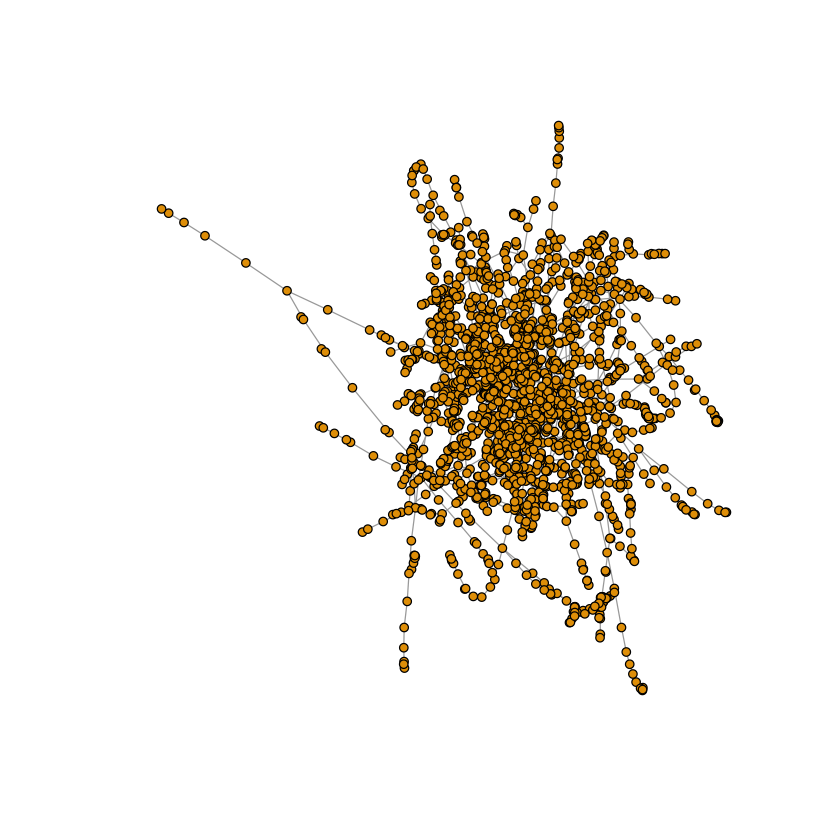

In [87]:
plot(g_mst, vertex.size=3, vertex.label=NA, layout=layout.fruchterman.reingold)

In [88]:
E(g_mst)

+ 1879/1879 edges from e59e7aa (vertex names):
 [1] 7  --25  20 --79  43 --101 55 --102 57 --102 64 --104 62 --105 13 --111
 [9] 138--8   93 --150 123--153 43 --191 63 --219 198--223 178--224 230--115
[17] 39 --253 141--254 252--274 171--282 216--290 74 --300 143--301 78 --302
[25] 303--304 251--309 210--311 274--312 286--323 221--328 199--331 329--331
[33] 41 --334 91 --338 315--338 309--349 6  --366 275--370 253--372 369--372
[41] 325--382 333--389 175--396 371--397 270--400 40 --401 242--403 89 --420
[49] 30 --422 291--423 59 --435 134--437 80 --445 113--445 288--447 58 --456
[57] 283--456 98 --458 321--458 167--466 333--468 290--470 393--470 103--472
[65] 104--472 218--473 382--473 385--477 225--480 485--486 416--488 188--505
[73] 516--517 339--530 394--530 299--532 434--536 113--537 233--543 542--543
+ ... omitted several edges

In [89]:
vertex_attr(g_mst, index=which(V(g_mst)$name == 7))

$name
[1] "7"

$location
[1] "[-121.99610391   38.32584685]"

$display_name
[1] "Unnamed Road, Vacaville"

In [90]:
vertex_attr(g_mst, index=which(V(g_mst)$name == 25))

$name
[1] "25"

$location
[1] "[-121.9796351    38.34320795]"

$display_name
[1] "400 Bowline Drive, Vacaville"